# Exploratory Data Analysis & Intro

## Goal

1. Investigate top-paying roles and skills in the data science industry.
2. Use Python to explore a real-live dataset on job postings.
3. For job-seekers: use these insights to help find the best job opportunities.

## Final Deliverables:
- Create Jupyter Notebookss (showcasing core skills in Python).
- Create a summary page (via [README.md](README.md)) capturing your findings.
- Share this project via GitHub & LinkedIn.

## Questions to Answer

1. What are the most demanded skills for the top 3 most popular data roles?
2. How are in-demand skills trending for Data Analysts?
3. How well do jobs and skills pay for Data Analysts?
4. What is the most optimal skill to learn for Data Analysts? (High Demand AND High Paying)

I'll be focusing on US Data Analyst roles, but you can adapt to any of the following:



## Exploratory Data Analysis for all Data Roles

### Roles to Explore

In [19]:
from datasets import load_dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast

In [97]:
dataset = load_dataset('lukebarousse/data_jobs') #dataset from huggingface
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [21]:
df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_pposted_date
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None,2023-06-16 13:44:15
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr...",2023-01-14 13:18:07
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],...",2023-10-10 13:14:55
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',...",2023-07-04 13:01:41
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl...",2023-08-07 14:29:36


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  object        
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

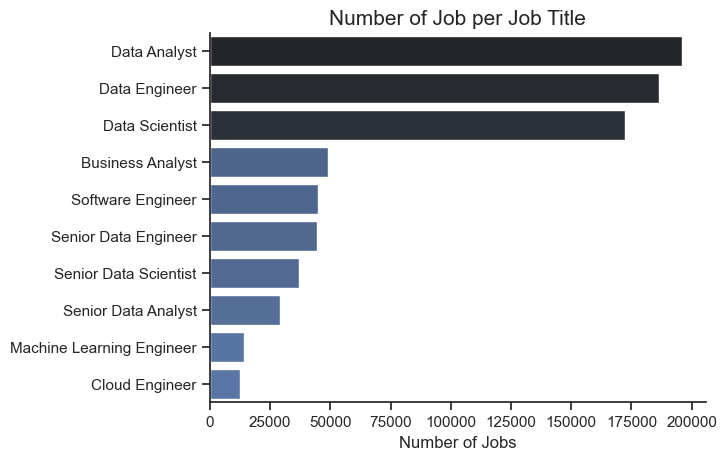

In [23]:
df_vis = df['job_title_short'].value_counts().reset_index()

sns.set_theme(style='ticks')
sns.barplot(data=df_vis,x='count',y= 'job_title_short',hue='count', palette='dark:b_r',legend=False)
sns.despine()
plt.title("Number of Job per Job Title", fontsize=15)
plt.xlabel("Number of Jobs")
plt.ylabel("")
plt.show()


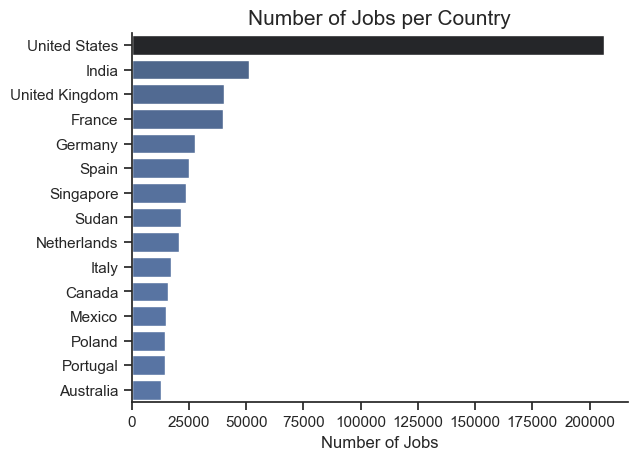

In [24]:
df_vis = df['job_country'].value_counts().to_frame().sort_values(by='count',ascending=False).head(15)

sns.color_palette("rocket")
sns.barplot(data=df_vis,x='count',y='job_country',hue='count',palette='dark:b_r',legend=False)
sns.despine()
plt.title("Number of Jobs per Country",fontsize=15)
plt.xlabel("Number of Jobs")
plt.ylabel("")
plt.show()

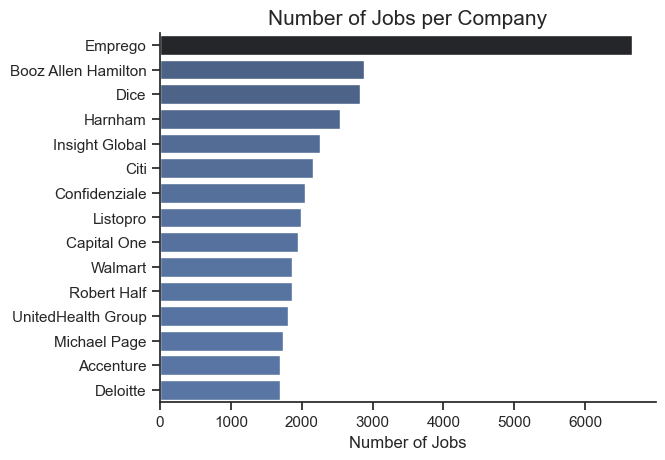

In [25]:
df_vis = df['company_name'].value_counts().reset_index().sort_values('count',ascending=False).head(15)

sns.barplot(x=df_vis['count'],y=df_vis['company_name'],hue=df_vis['count'],palette='dark:b_r',legend=False)
sns.despine()
plt.title("Number of Jobs per Company",fontsize=15)
plt.xlabel("Number of Jobs")
plt.ylabel("")
plt.show()

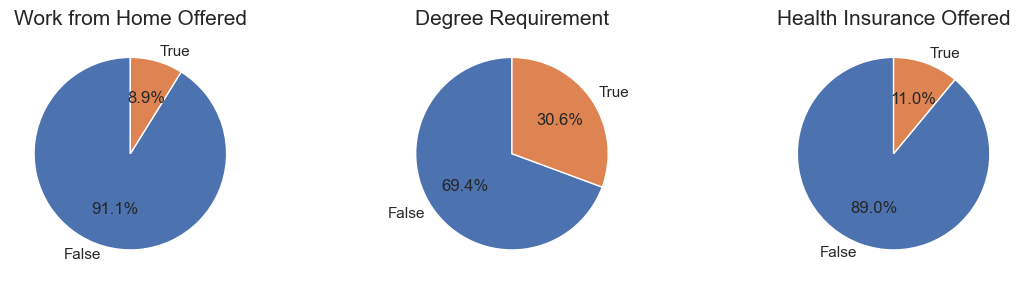

In [26]:
pie_dict = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}


fig, ax = plt.subplots(1,3, figsize=(12, 3))

for i,(key,title) in enumerate(pie_dict.items()):
    ax[i].pie(df[key].value_counts(),labels=['False','True'], autopct="%1.1f%%", startangle=90)
    ax[i].set_title(title,fontsize=15)

fig.tight_layout()
plt.show()



## Exploratory Data Analysis for Data Analysts in the US

##### Filter for US Data Analyst roles

In [99]:
df_us_da = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

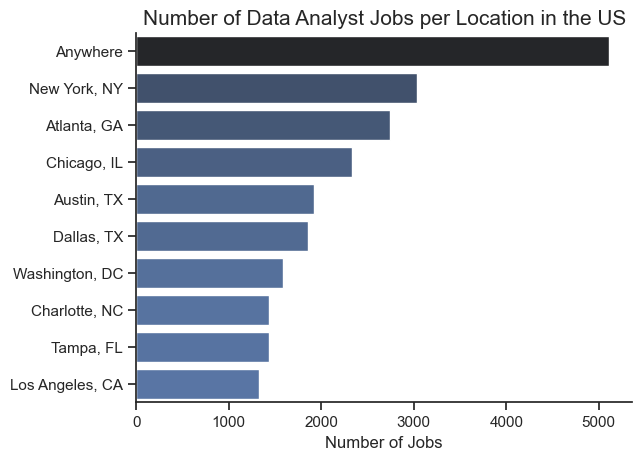

In [28]:
df_vis = df_us_da['job_location'].value_counts().to_frame().sort_values(by='count',ascending=False).head(10)

sns.barplot(data=df_vis, x='count',y='job_location', hue='count',palette='dark:b_r',legend=False)
sns.despine()
plt.title("Number of Data Analyst Jobs per Location in the US",fontsize=15)
plt.xlabel("Number of Jobs")
plt.ylabel("")
plt.show()

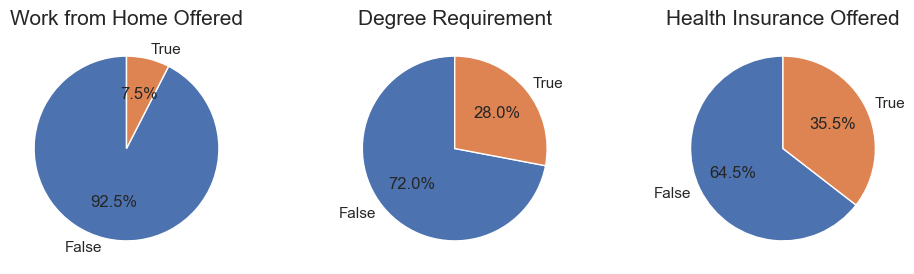

In [29]:

fig, ax = plt.subplots(1,3,figsize=(12,3))


for i, (key,title) in enumerate(pie_dict.items()):
    ax[i].pie(df_us_da[key].value_counts(),labels=['False','True'],autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title,fontsize=15)

plt.show()

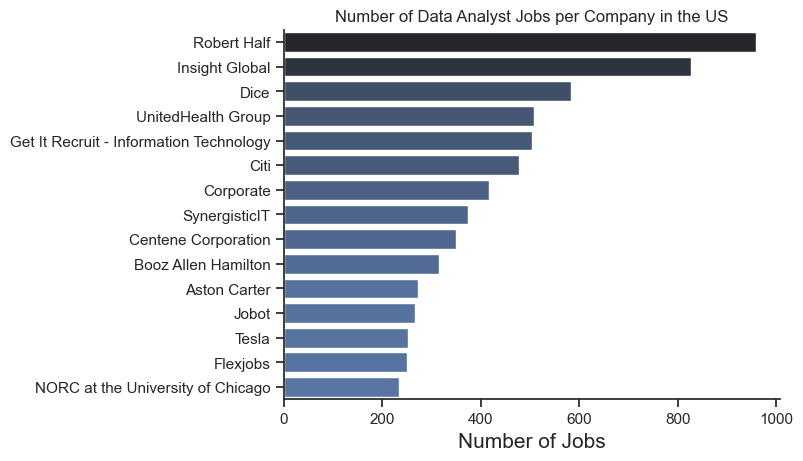

In [30]:
df_vis = df_us_da['company_name'].value_counts().to_frame().head(15)

sns.barplot(data=df_vis,x='count',y='company_name', hue='count', palette='dark:b_r',legend=False)
sns.despine()
plt.title("Number of Data Analyst Jobs per Company in the US")
plt.xlabel("Number of Jobs",fontsize=15)
plt.ylabel("")
plt.show()

In [32]:
df_us = df[df['job_country'] == 'United States']

In [33]:
df_skills = df_us.explode('job_skills')
df_skills

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_pposted_date
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None,2023-06-16 13:44:15
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,python,"{'cloud': ['aws'], 'libraries': ['tensorflow',...",2023-07-04 13:01:41
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,c++,"{'cloud': ['aws'], 'libraries': ['tensorflow',...",2023-07-04 13:01:41
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,java,"{'cloud': ['aws'], 'libraries': ['tensorflow',...",2023-07-04 13:01:41
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,matlab,"{'cloud': ['aws'], 'libraries': ['tensorflow',...",2023-07-04 13:01:41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785692,Data Scientist,Data Scientist- Hybrid Work Location,"Dayton, OH",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-04-21 06:02:31,False,True,United States,year,157500.0,NaN,Tenet3,r,"{'programming': ['python', 'matlab', 'r']}",2023-04-21 06:02:31
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None,2023-01-28 06:02:55
785705,Data Analyst,Expert Business Data Analyst - Now Hiring,"Oakland, CA",via Snagajob,Full-time,False,"California, United States",2023-01-09 06:00:25,False,False,United States,None,NaN,NaN,PG&E Corporation,sql,"{'analyst_tools': ['tableau'], 'programming': ...",2023-01-09 06:00:25
785705,Data Analyst,Expert Business Data Analyst - Now Hiring,"Oakland, CA",via Snagajob,Full-time,False,"California, United States",2023-01-09 06:00:25,False,False,United States,None,NaN,NaN,PG&E Corporation,python,"{'analyst_tools': ['tableau'], 'programming': ...",2023-01-09 06:00:25


In [40]:
df_skills_count = df_skills.groupby(['job_skills','job_title_short']).size()
df_skills_count = df_skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count', ascending=False,inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


In [45]:
job_titles = df_skills_count['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[:3])
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

In [74]:
df_job_title_count = df_us['job_title_short'].value_counts().reset_index(name='job_total')
df_job_title_count

,job_title_short,job_total
0,Data Analyst,67816
1,Data Scientist,58830
2,Data Engineer,35080
3,Senior Data Scientist,12946
4,Senior Data Analyst,11791
5,Senior Data Engineer,9289
6,Business Analyst,7382
7,Software Engineer,1814
8,Machine Learning Engineer,921
9,Cloud Engineer,423


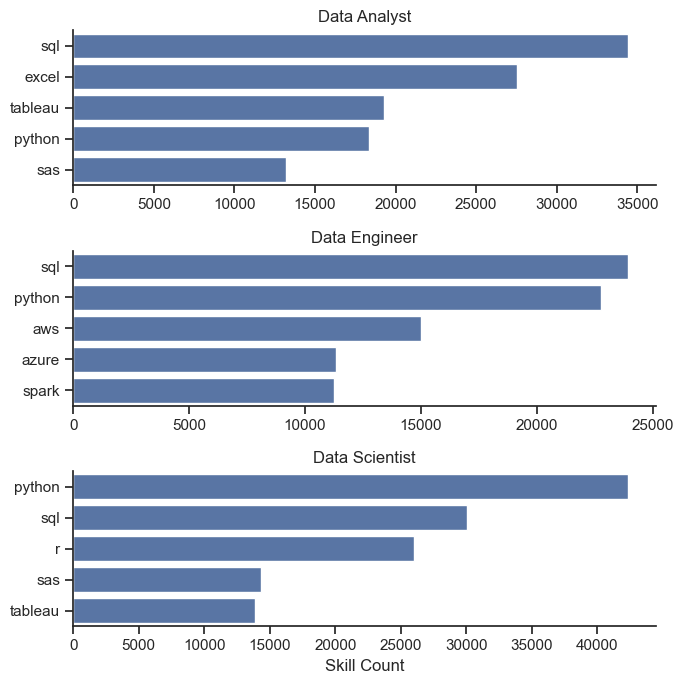

In [72]:
fig, ax = plt.subplots(len(job_titles),1,figsize=(7,7))

for i, title in enumerate(job_titles):
    df_vis = df_skills_count[df_skills_count['job_title_short'] == title].head(5)
    sns.barplot(data=df_vis, x='skill_count', y='job_skills',ax=ax[i])
    sns.despine()
    ax[i].set_ylabel("")
    ax[i].set_title(title)
    if i < len(job_titles)-1:
        ax[i].set_xlabel("")
    else:
        ax[i].set_xlabel("Skill Count")

fig.tight_layout()
plt.show()

In [78]:

df_skills_percent = pd.merge(df_skills_count,df_job_title_count, how='left', on='job_title_short')

df_skills_percent['skill_percent'] = 100 * df_skills_percent['skill_count'] / df_skills_percent['job_total']

df_skills_percent

,job_skills,job_title_short,skill_count,job_total,skill_percent
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,clojure,Software Engineer,1,1814,0.055127
1866,vb.net,Senior Data Scientist,1,12946,0.007724
1867,fortran,Machine Learning Engineer,1,921,0.108578
1868,planner,Cloud Engineer,1,423,0.236407


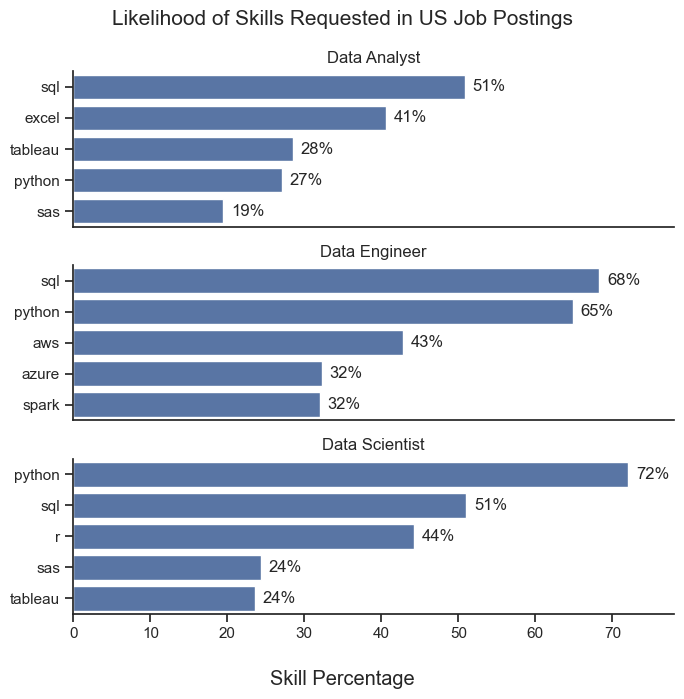

In [94]:
fig, ax = plt.subplots(len(job_titles),1,figsize=(7,7))

for i, title in enumerate(job_titles):
    df_vis = df_skills_percent[df_skills_percent['job_title_short'] == title].head(5)
    sns.barplot(data=df_vis, x='skill_percent', y='job_skills',ax=ax[i])
    sns.despine()
    ax[i].set_ylabel("")
    ax[i].set_title(title)
    ax[i].set_xlabel("")
    ax[i].set_xlim(0,78)
    for n, val in enumerate(df_vis['skill_percent']):
        ax[i].text(val + 1,n, f"{val:.0f}%",va='center')
    if i < len(job_titles)-1:
        ax[i].set_xticks([])

fig.suptitle("Likelihood of Skills Requested in US Job Postings", fontsize=15)
fig.supxlabel("Skill Percentage")
fig.tight_layout()
plt.show()

In [100]:
df_us_da['job_posted_month_no'] = df_us_da['job_posted_date'].dt.month

In [102]:
df_us_da_explode = df_us_da.explode('job_skills')
df_us_da_explode.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month_no
36,Data Analyst,Data Analyst,"Des Moines, IA",via Trabajo.org,Full-time,False,"Illinois, United States",2023-11-06 13:01:22,False,True,United States,None,NaN,NaN,Assuredpartners,None,None,11
68,Data Analyst,Sr. Research Data Analyst,"Baltimore, MD",via ZipRecruiter,Full-time,False,"New York, United States",2023-03-24 13:01:00,False,False,United States,None,NaN,NaN,Johns Hopkins Medicine,r,"{'programming': ['r'], 'sync': ['zoom']}",3
68,Data Analyst,Sr. Research Data Analyst,"Baltimore, MD",via ZipRecruiter,Full-time,False,"New York, United States",2023-03-24 13:01:00,False,False,United States,None,NaN,NaN,Johns Hopkins Medicine,zoom,"{'programming': ['r'], 'sync': ['zoom']}",3
73,Data Analyst,Entry level / Systems Data Analyst (Remote),Anywhere,via LinkedIn,Contractor,True,"Illinois, United States",2023-06-16 13:18:22,True,True,United States,None,NaN,NaN,Soft Magic,word,"{'analyst_tools': ['word', 'excel', 'powerpoin...",6
73,Data Analyst,Entry level / Systems Data Analyst (Remote),Anywhere,via LinkedIn,Contractor,True,"Illinois, United States",2023-06-16 13:18:22,True,True,United States,None,NaN,NaN,Soft Magic,excel,"{'analyst_tools': ['word', 'excel', 'powerpoin...",6


In [116]:
df_us_da_explode_pivot = df_us_da_explode.pivot_table(index='job_posted_month_no',columns='job_skills', aggfunc='size',fill_value=0)

df_us_da_explode_pivot.loc['total'] = df_us_da_explode_pivot.sum()
df_us_da_explode_pivot


job_skills,airflow,airtable,alteryx,angular,ansible,apl,arch,asana,asp.net,asp.net core,...,watson,webex,windows,wire,word,workfront,wrike,xamarin,yarn,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,39,7,206,21,7,1,0,15,17,0,...,7,9,80,3,968,0,7,0,0,30
2,35,0,203,23,4,1,0,14,9,0,...,6,6,92,3,738,3,0,0,0,19
3,39,1,219,5,5,6,1,14,11,0,...,7,6,76,5,736,1,1,1,0,16
4,28,1,208,8,3,7,3,5,6,0,...,2,4,86,9,695,8,1,0,0,12
5,27,3,144,15,8,9,1,5,13,0,...,1,6,67,1,557,3,0,0,0,9
6,39,5,188,9,4,8,3,7,7,0,...,5,2,69,8,721,5,0,0,0,20
7,42,2,160,5,3,5,5,6,2,0,...,4,1,59,10,587,0,0,0,1,13
8,44,2,187,5,3,10,0,5,3,0,...,3,6,87,4,752,0,0,0,0,26
9,22,3,145,11,2,3,4,4,3,0,...,0,4,80,4,478,0,0,0,1,12


In [123]:
df_us_da_explode_pivot=df_us_da_explode_pivot[df_us_da_explode_pivot.loc['total'].sort_values(ascending=False).index]
df_us_da_explode_pivot=df_us_da_explode_pivot.drop('total')
df_us_da_explode_pivot

job_skills,sql,excel,tableau,python,sas,r,power bi,word,powerpoint,oracle,...,google chat,theano,ionic,asp.net core,qt,couchdb,capacitor,codecommit,chainer,msaccess
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,4601,3592,2488,2254,1832,1513,1337,968,972,718,...,0,0,0,0,0,0,1,1,0,0
2,3168,2587,1676,1618,1212,1045,1122,738,705,514,...,0,0,0,0,0,0,0,0,0,0
3,3226,2661,1804,1683,1238,1141,1054,736,669,418,...,1,0,0,0,0,0,0,0,0,0
4,3220,2549,1789,1679,1302,1038,1057,695,650,439,...,0,0,1,0,0,1,0,0,0,0
5,2581,2118,1432,1349,972,867,860,557,515,358,...,0,0,0,0,0,0,0,0,0,1
6,2862,2382,1628,1609,984,1017,989,721,624,414,...,0,0,0,0,1,0,0,0,0,0
7,2609,2118,1533,1438,996,881,881,587,549,401,...,0,0,0,0,0,0,0,0,0,0
8,3414,2731,1951,2025,1276,1271,1208,752,746,484,...,0,0,0,0,0,0,0,0,0,0
9,2295,1801,1353,1229,856,746,820,478,475,359,...,0,0,0,0,0,0,0,0,0,0


In [137]:
df_us_da_totals = df_us_da.groupby('job_posted_month_no').size()
df_us_da_totals

job_posted_month_no
1     8494
2     6124
3     6218
4     6049
5     4993
6     5683
7     5201
8     6634
9     4639
10    5271
11    4531
12    3979
dtype: int64

In [138]:
df_us_da_percent = df_us_da_explode_pivot.div(df_us_da_totals/100,axis=0)
df_us_da_percent

job_skills,sql,excel,tableau,python,sas,r,power bi,word,powerpoint,oracle,...,google chat,theano,ionic,asp.net core,qt,couchdb,capacitor,codecommit,chainer,msaccess
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,54.167648,42.288674,29.291264,26.536379,21.568166,17.812574,15.740523,11.396280,11.443372,8.453026,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011773,0.011773,0.000000,0.000000
2,51.730895,42.243632,27.367734,26.420640,19.790986,17.064010,18.321359,12.050947,11.512084,8.393207,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,51.881634,42.795111,29.012544,27.066581,19.909939,18.349952,16.950788,11.836603,10.759087,6.722419,...,0.016082,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,53.231939,42.139197,29.575136,27.756654,21.524219,17.159861,17.473963,11.489502,10.745578,7.257398,...,0.000000,0.000000,0.016532,0.000000,0.000000,0.016532,0.000000,0.000000,0.000000,0.000000
5,51.692369,42.419387,28.680152,27.017825,19.467254,17.364310,17.224114,11.155618,10.314440,7.170038,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020028
6,50.360725,41.914482,28.646841,28.312511,17.314799,17.895478,17.402780,12.686961,10.980116,7.284885,...,0.000000,0.000000,0.000000,0.000000,0.017596,0.000000,0.000000,0.000000,0.000000,0.000000
7,50.163430,40.722938,29.475101,27.648529,19.150163,16.939050,16.939050,11.286291,10.555662,7.710056,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,51.462165,41.166717,29.409105,30.524570,19.234248,19.158879,18.209225,11.335544,11.245101,7.295749,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,49.471869,38.823022,29.165768,26.492779,18.452253,16.081052,17.676223,10.303945,10.239276,7.738737,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [139]:
df_us_da_percent = df_us_da_percent.reset_index()
df_us_da_percent['job_posted_month'] = df_us_da_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x,format='%m').strftime('%b'))
df_us_da_percent = df_us_da_percent.set_index('job_posted_month')
df_us_da_percent = df_us_da_percent.drop(columns='job_posted_month_no')
df_us_da_percent

job_skills,sql,excel,tableau,python,sas,r,power bi,word,powerpoint,oracle,...,google chat,theano,ionic,asp.net core,qt,couchdb,capacitor,codecommit,chainer,msaccess
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,54.167648,42.288674,29.291264,26.536379,21.568166,17.812574,15.740523,11.396280,11.443372,8.453026,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011773,0.011773,0.000000,0.000000
Feb,51.730895,42.243632,27.367734,26.420640,19.790986,17.064010,18.321359,12.050947,11.512084,8.393207,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,51.881634,42.795111,29.012544,27.066581,19.909939,18.349952,16.950788,11.836603,10.759087,6.722419,...,0.016082,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Apr,53.231939,42.139197,29.575136,27.756654,21.524219,17.159861,17.473963,11.489502,10.745578,7.257398,...,0.000000,0.000000,0.016532,0.000000,0.000000,0.016532,0.000000,0.000000,0.000000,0.000000
May,51.692369,42.419387,28.680152,27.017825,19.467254,17.364310,17.224114,11.155618,10.314440,7.170038,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020028
Jun,50.360725,41.914482,28.646841,28.312511,17.314799,17.895478,17.402780,12.686961,10.980116,7.284885,...,0.000000,0.000000,0.000000,0.000000,0.017596,0.000000,0.000000,0.000000,0.000000,0.000000
Jul,50.163430,40.722938,29.475101,27.648529,19.150163,16.939050,16.939050,11.286291,10.555662,7.710056,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Aug,51.462165,41.166717,29.409105,30.524570,19.234248,19.158879,18.209225,11.335544,11.245101,7.295749,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sep,49.471869,38.823022,29.165768,26.492779,18.452253,16.081052,17.676223,10.303945,10.239276,7.738737,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


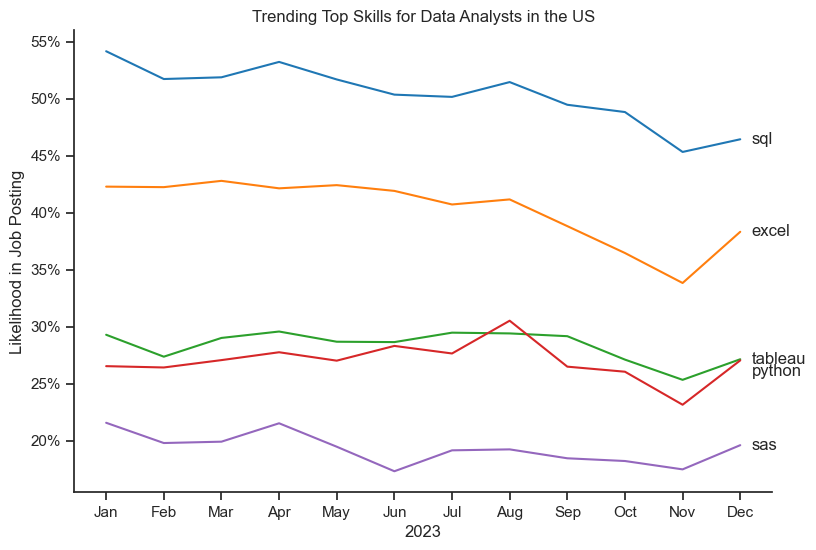

In [224]:
from adjustText import adjust_text
plt.figure(figsize=(9, 6))
df_vis = df_us_da_percent.iloc[:,:5]
sns.lineplot(data=df_vis, dashes=False, palette='tab10')
sns.despine()
plt.title("Trending Top Skills for Data Analysts in the US")
plt.ylabel("Likelihood in Job Posting")
plt.xlabel('2023')
plt.legend().remove()


last_x = len(df_vis) - 1
y_pos = set()

for i in range(5):
    y = df_vis.iloc[-1, i]
    va = 'center'
    ha = 'left'
    while int(y) in y_pos:
        y -= 1
    plt.text( 11.2, y, df_vis.columns[i], ha=ha,va=va)
    y_pos.add(int(y))
from matplotlib.ticker import PercentFormatter
ax= plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))
plt.show()


In [235]:
df_us = df_us.dropna(subset=['salary_year_avg'])
df_us

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_pposted_date
92,Data Engineer,Remote - Data Engineer - Permanent - W2,Anywhere,via LinkedIn,Full-time,True,"Illinois, United States",2023-02-21 13:29:59,False,True,United States,year,120000.0,NaN,Apex Systems,"[sql, python]","{'programming': ['sql', 'python']}",2023-02-21 13:29:59
100,Data Scientist,"Data Scientist, Risk Data Mining - USDS","Mountain View, CA",via LinkedIn,Full-time,False,"California, United States",2023-07-31 13:01:18,False,True,United States,year,228222.0,NaN,TikTok,"[sql, r, python, express]","{'programming': ['sql', 'r', 'python'], 'webfr...",2023-07-31 13:01:18
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"[python, r, alteryx, tableau]","{'analyst_tools': ['alteryx', 'tableau'], 'pro...",2023-10-12 13:02:19
116,Data Scientist,Data Scientist,Anywhere,via LinkedIn,Full-time,True,"Texas, United States",2023-10-04 13:04:23,False,False,United States,year,114000.0,NaN,4 Corner Resources,"[r, python, sql, t-sql, hadoop, spark, tableau]","{'analyst_tools': ['tableau'], 'libraries': ['...",2023-10-04 13:04:23
146,Data Engineer,Data Engineer Graduate (Real Time Communicatio...,"Seattle, WA",via LinkedIn,Full-time,False,"California, United States",2023-10-21 13:06:16,False,True,United States,year,129500.0,NaN,ByteDance,"[golang, scala, python, java, hadoop, spark]","{'libraries': ['hadoop', 'spark'], 'programmin...",2023-10-21 13:06:16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785563,Data Scientist,Data Scientist I/II (Model Risk Management & M...,"Pensacola, FL",via Navy Federal Credit Union - Talentify,Full-time,False,"Florida, United States",2023-01-11 06:22:10,False,False,United States,year,136400.0,NaN,Navy Federal Credit Union,"[r, python, matplotlib, ggplot2, spark, word, ...","{'analyst_tools': ['word', 'power bi', 'tablea...",2023-01-11 06:22:10
785624,Data Engineer,Data Analytics Engineer (Hybrid),"Mt Prospect, IL",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-08-31 06:02:16,False,True,United States,year,139216.0,NaN,Bosch Group,"[go, python, r, sql, oracle, windows, alteryx,...","{'analyst_tools': ['alteryx', 'power bi', 'tab...",2023-08-31 06:02:16
785641,Data Engineer,Data Engineer,"New York, NY",via Dice,Full-time,False,Georgia,2023-01-04 16:36:07,True,False,United States,year,150000.0,NaN,"Engage Partners, Inc.",None,None,2023-01-04 16:36:07
785648,Data Scientist,Director Data Scientist - Commercial Platforms...,"Pleasant Hill, CA",via Ai-Jobs.net,Full-time,False,"California, United States",2023-04-12 06:02:51,False,True,United States,year,221875.0,NaN,84.51°,"[python, azure, snowflake, spark]","{'cloud': ['azure', 'snowflake'], 'libraries':...",2023-04-12 06:02:51


In [237]:
job_titles = df_us['job_title_short'].value_counts().index[:6].tolist()
job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [238]:
df_us_top6 = df_us[df_us['job_title_short'].isin(job_titles)]
df_us_top6

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_pposted_date
92,Data Engineer,Remote - Data Engineer - Permanent - W2,Anywhere,via LinkedIn,Full-time,True,"Illinois, United States",2023-02-21 13:29:59,False,True,United States,year,120000.0,NaN,Apex Systems,"[sql, python]","{'programming': ['sql', 'python']}",2023-02-21 13:29:59
100,Data Scientist,"Data Scientist, Risk Data Mining - USDS","Mountain View, CA",via LinkedIn,Full-time,False,"California, United States",2023-07-31 13:01:18,False,True,United States,year,228222.0,NaN,TikTok,"[sql, r, python, express]","{'programming': ['sql', 'r', 'python'], 'webfr...",2023-07-31 13:01:18
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"[python, r, alteryx, tableau]","{'analyst_tools': ['alteryx', 'tableau'], 'pro...",2023-10-12 13:02:19
116,Data Scientist,Data Scientist,Anywhere,via LinkedIn,Full-time,True,"Texas, United States",2023-10-04 13:04:23,False,False,United States,year,114000.0,NaN,4 Corner Resources,"[r, python, sql, t-sql, hadoop, spark, tableau]","{'analyst_tools': ['tableau'], 'libraries': ['...",2023-10-04 13:04:23
146,Data Engineer,Data Engineer Graduate (Real Time Communicatio...,"Seattle, WA",via LinkedIn,Full-time,False,"California, United States",2023-10-21 13:06:16,False,True,United States,year,129500.0,NaN,ByteDance,"[golang, scala, python, java, hadoop, spark]","{'libraries': ['hadoop', 'spark'], 'programmin...",2023-10-21 13:06:16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785563,Data Scientist,Data Scientist I/II (Model Risk Management & M...,"Pensacola, FL",via Navy Federal Credit Union - Talentify,Full-time,False,"Florida, United States",2023-01-11 06:22:10,False,False,United States,year,136400.0,NaN,Navy Federal Credit Union,"[r, python, matplotlib, ggplot2, spark, word, ...","{'analyst_tools': ['word', 'power bi', 'tablea...",2023-01-11 06:22:10
785624,Data Engineer,Data Analytics Engineer (Hybrid),"Mt Prospect, IL",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-08-31 06:02:16,False,True,United States,year,139216.0,NaN,Bosch Group,"[go, python, r, sql, oracle, windows, alteryx,...","{'analyst_tools': ['alteryx', 'power bi', 'tab...",2023-08-31 06:02:16
785641,Data Engineer,Data Engineer,"New York, NY",via Dice,Full-time,False,Georgia,2023-01-04 16:36:07,True,False,United States,year,150000.0,NaN,"Engage Partners, Inc.",None,None,2023-01-04 16:36:07
785648,Data Scientist,Director Data Scientist - Commercial Platforms...,"Pleasant Hill, CA",via Ai-Jobs.net,Full-time,False,"California, United States",2023-04-12 06:02:51,False,True,United States,year,221875.0,NaN,84.51°,"[python, azure, snowflake, spark]","{'cloud': ['azure', 'snowflake'], 'libraries':...",2023-04-12 06:02:51


In [259]:
job_order = df_us_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index
job_order

Index(['Senior Data Scientist', 'Senior Data Engineer', 'Data Scientist',
       'Data Engineer', 'Senior Data Analyst', 'Data Analyst'],
      dtype='object', name='job_title_short')

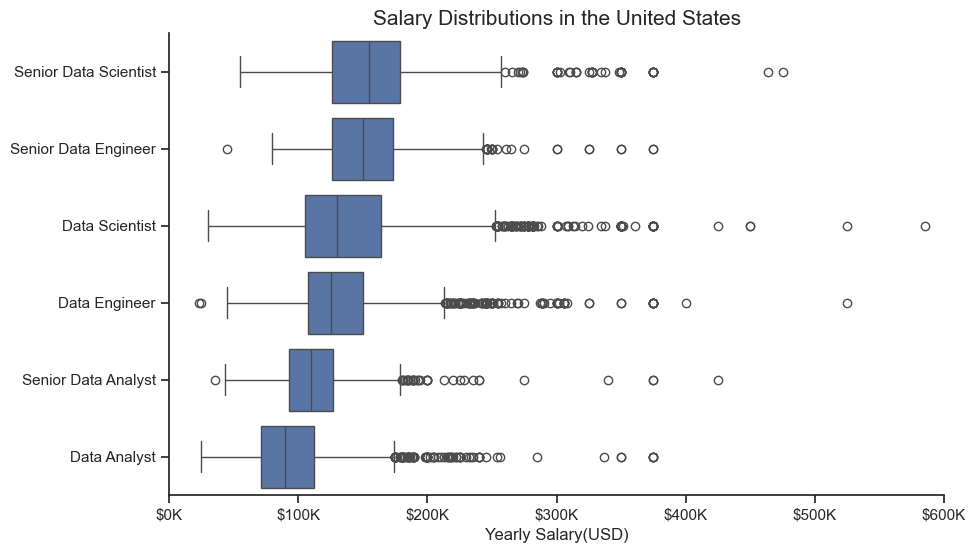

In [261]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_us_top6,x='salary_year_avg', y='job_title_short', order=job_order)
sns.despine()
sns.set_theme(style='ticks')

plt.title('Salary Distributions in the United States',fontsize=15)
plt.xlabel('Yearly Salary(USD)')
plt.ylabel("")
plt.xlim(0,600000)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'${int(x/1000)}K'))
plt.show()

In [263]:
df_us_da.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67816 entries, 36 to 785705
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   job_title_short        67816 non-null  object        
 1   job_title              67816 non-null  object        
 2   job_location           67582 non-null  object        
 3   job_via                67809 non-null  object        
 4   job_schedule_type      67107 non-null  object        
 5   job_work_from_home     67816 non-null  bool          
 6   search_location        67816 non-null  object        
 7   job_posted_date        67816 non-null  datetime64[ns]
 8   job_no_degree_mention  67816 non-null  bool          
 9   job_health_insurance   67816 non-null  bool          
 10  job_country            67816 non-null  object        
 11  salary_rate            8442 non-null   object        
 12  salary_year_avg        4350 non-null   float64       
 13  sala

In [267]:
df_us_da = df_us_da.dropna(subset='salary_year_avg')

In [269]:
df_us_da_explode = df_us_da.explode('job_skills')
df_us_da_explode[['salary_year_avg','job_skills']].head()

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [282]:
df_skills_top_pay = df_us_da_explode.groupby('job_skills')['salary_year_avg'].agg(['count','median'])
df_skills_top_pay.columns = ['skill_count','median_salary']
df_skills_top_pay = df_skills_top_pay.sort_values(by='median_salary', ascending=False).head(10)
df_skills_top_pay


,skill_count,median_salary
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


In [286]:
df_skills_count = df_us_da_explode.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count', ascending=False)
df_skills_count.columns = ['skill_count','median_salary']
df_skills_count = df_skills_count.head(10).sort_values(by='median_salary', ascending=False)
df_skills_count

,skill_count,median_salary
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


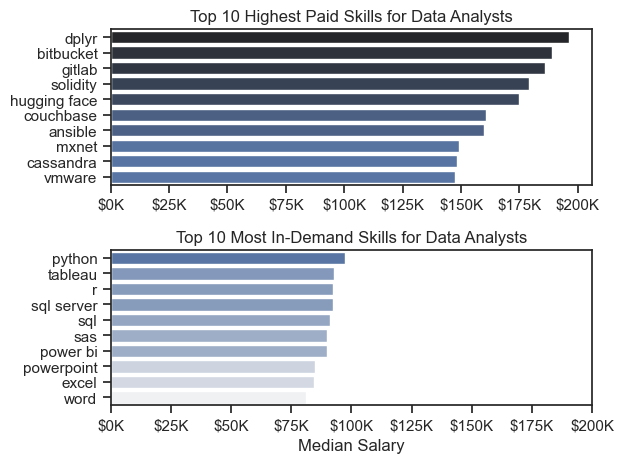

In [308]:
fig, ax = plt.subplots(2,1)

sns.barplot(data=df_skills_top_pay, x='median_salary', y='job_skills', ax=ax[0], hue='median_salary', palette='dark:b_r', legend=False)
ax[0].set_ylabel("")
ax[0].set_xlabel("")
ax[0].set_title("Top 10 Highest Paid Skills for Data Analysts")
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'${int(x/1000)}K'))

sns.barplot(data=df_skills_count, x='median_salary', y='job_skills',ax=ax[1], hue='median_salary', palette='light:b', legend=False)
ax[1].set_xlim(0,200000)
ax[1].set_ylabel("")
ax[1].set_xlabel("Median Salary")
ax[1].set_title("Top 10 Most In-Demand Skills for Data Analysts")
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'${int(x/1000)}K'))


fig.tight_layout()
plt.show()

In [318]:
df_skills_count = df_us_da_explode.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False)
df_skills_count = df_skills_count.rename(columns={'count':'skill_count','median':'median_salary'})
da_job_count = len(df_us_da)

df_skills_count['skill_percent'] = df_skills_count['skill_count'] / da_job_count * 100


df_skills_count

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.0,57.655172
excel,1808,84392.0,41.563218
python,1431,97500.0,32.896552
tableau,1364,92875.0,31.356322
sas,926,90000.0,21.287356
...,...,...,...
couchbase,1,160515.0,0.022989
chainer,1,100000.0,0.022989
chef,1,85000.0,0.022989


In [319]:
skill_percent = 5

df_da_high_demand = df_skills_count[df_skills_count['skill_percent'] > skill_percent]
df_da_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


In [372]:
import ast

df_tech = df['job_type_skills'].copy()
df_tech = df_tech.drop_duplicates().dropna()

tech_dict = {}
seen_skills = set()   # keep track of already assigned skills

for row in df_tech:
    row_dict = ast.literal_eval(row)
    for key, value in row_dict.items():
        if key not in tech_dict:
            tech_dict[key] = []

        for skill in value:
            if skill not in seen_skills:  # only add if not seen before
                tech_dict[key].append(skill)
                seen_skills.add(skill)

tech_dict

{'analyst_tools': ['power bi',
  'tableau',
  'dax',
  'excel',
  'powerpoint',
  'qlik',
  'sap',
  'looker',
  'word',
  'sas',
  'spss',
  'microstrategy',
  'cognos',
  'outlook',
  'splunk',
  'alteryx',
  'ssis',
  'sharepoint',
  'ms access',
  'visio',
  'datarobot',
  'ssrs',
  'spreadsheet',
  'sheets',
  'powerbi',
  'nuix',
  'msaccess',
  'esquisse'],
 'programming': ['r',
  'python',
  'sql',
  'nosql',
  'c#',
  'c++',
  'java',
  'matlab',
  'bash',
  'php',
  'go',
  'ruby',
  'javascript',
  'powershell',
  'apl',
  'scala',
  'mongo',
  'shell',
  'vba',
  'c',
  'html',
  'css',
  'lua',
  'perl',
  'golang',
  't-sql',
  'typescript',
  'sass',
  'visual basic',
  'solidity',
  'swift',
  'kotlin',
  'julia',
  'fortran',
  'no-sql',
  'groovy',
  'crystal',
  'rust',
  'assembly',
  'dart',
  'f#',
  'cobol',
  'objective-c',
  'vb.net',
  'elixir',
  'pascal',
  'lisp',
  'clojure',
  'delphi',
  'erlang',
  'haskell',
  'ocaml',
  'visualbasic'],
 'cloud': ['azu

In [373]:
df_tech = pd.DataFrame(list(tech_dict.items()), columns=['technology', 'skills'])

df_tech = df_tech.explode('skills')

df_tech

,technology,skills
0,analyst_tools,power bi
0,analyst_tools,tableau
0,analyst_tools,dax
0,analyst_tools,excel
0,analyst_tools,powerpoint
...,...,...
9,sync,webex
9,sync,wire
9,sync,mattermost
9,sync,google chat


In [374]:
df_da_skills_tech = df_da_high_demand.merge(df_tech, left_on='job_skills', right_on='skills')

df_da_skills_tech.drop_duplicates()

,skill_count,median_salary,skill_percent,technology,skills
0,2508,91000.00,57.655172,programming,sql
1,1808,84392.00,41.563218,analyst_tools,excel
2,1431,97500.00,32.896552,programming,python
3,1364,92875.00,31.356322,analyst_tools,tableau
4,926,90000.00,21.287356,analyst_tools,sas
5,893,92500.00,20.528736,programming,r
6,838,90000.00,19.264368,analyst_tools,power bi
7,462,85000.00,10.620690,analyst_tools,powerpoint
8,461,81194.75,10.597701,analyst_tools,word
9,286,92500.00,6.574713,databases,sql server


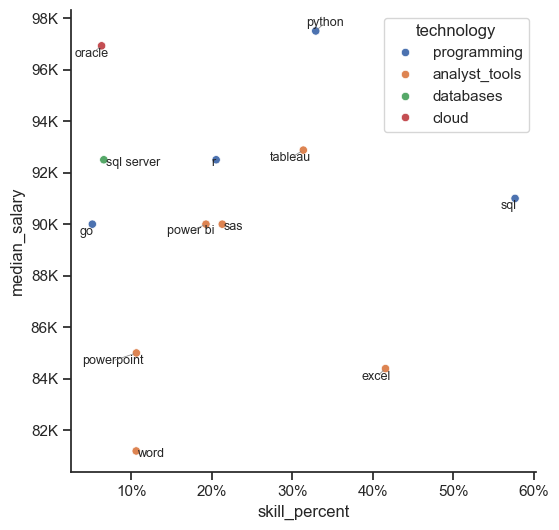

In [375]:

plt.figure(figsize=(6,6))
sns.scatterplot(data=df_da_skills_tech, x= 'skill_percent', y='median_salary',hue='technology')
sns.despine()
sns.set_theme(style='ticks')
texts = []
for i,txt in enumerate(df_da_skills_tech['skills']):
    x = df_da_skills_tech['skill_percent'].iloc[i]
    y = df_da_skills_tech['median_salary'].iloc[i]
    texts.append(
        plt.text(x, y, txt, fontsize=9, ha='center', va='center')
    )

adjust_text(
    texts,
    only_move={'points': 'y', 'texts': 'xy'},   
    expand_points=(2, 2),                   
    expand_text=(2, 2),
    force_points=1,                           
    arrowprops=dict(arrowstyle="-", color="gray", lw=0.5)  
)

plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'{x:.0f}%'))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y,_: f'{int(y/1000)}K'))
plt.show()